In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm

#from mc_io_functions import load_mc_particles
#from mc_io_functions import load_mc_hits
#from mc_io_functions import load_mc_sensor_response

from invisible_cities.core.core_functions  import shift_to_bin_centers
from invisible_cities.core                 import fit_functions as fitf
#from invisible_cities.icaro.hst_functions import hist
#from invisible_cities.icaro.hst_functions import hist2d
#from invisible_cities.icaro.hst_functions import hist2d_profile
#from invisible_cities.icaro.hst_functions import labels


In [2]:
def hist(*args, **kwargs):
    """
    Create a figure and then the histogram
    """
    create_new_figure(kwargs)

    y, x, p = plt.hist(*args, **kwargs)
    return y, shift_to_bin_centers(x), p


def hist2d(*args, **kwargs):
    """
    Create a figure and then the histogram
    """
    create_new_figure(kwargs)

    z, x, y, p = plt.hist2d(*args, **kwargs)
    return z, shift_to_bin_centers(x), shift_to_bin_centers(y), p

def hist2d_profile(x, y, z, nbinx, nbiny, xrange, yrange, **kwargs):
    """
    Create a profile 2d of the data and plot it as an histogram.
    """
    x, y, z, ze = fitf.profileXY(x, y, z, nbinx, nbiny, xrange, yrange)
    plot_output = display_matrix(x, y, z, **kwargs)
    return ((x, y, z, ze), *plot_output)

def display_matrix(x, y, z, mask=None, **kwargs):
    """
    Display the matrix z using the coordinates x and y as the bin centers.
    """
    nx = x = np.size(x)
    ny = np.size(y)

    dx = (np.max(x) - np.min(x)) / nx
    dy = (np.max(y) - np.min(y)) / ny

    x_binning = np.linspace(np.min(x) - dx, np.max(x) + dx, nx + 1)
    y_binning = np.linspace(np.min(y) - dy, np.max(y) + dy, ny + 1)

    x_ = np.repeat(x, ny)
    y_ = np.tile  (y, nx)
    z_ = z.flatten()

    if mask is None:
        mask = np.ones_like(z_, dtype=bool)
    else:
        mask = mask.flatten()
    h  = hist2d(x_[mask], y_[mask], (x_binning,
                                     y_binning),
                weights = z_[mask],
                **kwargs)
    return h, plt.colorbar()

def create_new_figure(kwargs):
    if kwargs.setdefault("new_figure", True):
        plt.figure()
    del kwargs["new_figure"]

def labels(xlabel, ylabel, title=""):
    """
    Set x and y labels.
    """
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title ( title)
    
def EnergyRes(x):
    mu = np.mean(x)
    sigma = np.std(x)
    fwhm = 2.355*sigma/mu
    e_event = 41 # keV
    eres = fwhm*e_event
    return fwhm*100 # FWHM  # what units is this????

In [10]:
#nfiles = 2
#dirname = "/n/holystore01/LABS/guenette_lab/Users/tcontreras/nexus-production/test/"
#files = ["flex.kr83m."+str(i)+".nexus.h5" for i in range(1,2)]
#files_8 = ["/Users/taylorcontreras/Development/Research/Odyssey_sipmstudy/pitch_8mm/flex.kr83m."+str(i)+".nexus.h5" for i in range(0,nfiles)]
#config = pd.read_hdf(files[0], "MC/configuration")
tbin_sipms = 1.0 #mus
t1_s1 = 99 #  mus
t2_s1 = 102 #mus
t1_s2 = 102 #mus

test_file = ["/Users/taylorcontreras/Development/Research/trackingplane/s3mmp15mm/flex.kr83m.1.nexus.h5"]
config = pd.read_hdf(test_file[0], "MC/configuration")

In [11]:
config

,param_key,param_value
0,event_type,other
1,num_events,100
2,saved_events,100
3,interacting_events,0
4,PmtR11410_binning,0.025000 mus
5,TP_SiPM_binning,1.000000 mus
6,/PhysicsList/RegisterPhysics,G4EmStandardPhysics_option4
7,/PhysicsList/RegisterPhysics,G4DecayPhysics
8,/PhysicsList/RegisterPhysics,G4RadioactiveDecayPhysics
9,/PhysicsList/RegisterPhysics,G4OpticalPhysics


In [12]:
sns_response = pd.read_hdf(test_file[0], 'MC/sns_response')
sns_positions = pd.read_hdf(test_file[0], 'MC/sns_positions')
sns_positions = sns_positions.drop_duplicates(subset='sensor_id')
sns_positions

,sensor_id,sensor_name,x,y,z
0,8,PmtR11410,-125.000000,2.165063e+02,1468.699951
1,21,PmtR11410,-375.000000,4.592426e-14,1468.699951
2,17,PmtR11410,187.540558,-1.082298e+02,1468.699951
3,49,PmtR11410,-0.081102,4.330595e+02,1468.699951
4,48,PmtR11410,375.000000,2.166000e+02,1468.699951
5,20,PmtR11410,-187.500000,3.247595e+02,1468.699951
6,25,PmtR11410,62.459450,3.247829e+02,1468.699951
7,54,PmtR11410,312.500000,3.249000e+02,1468.699951
8,22,PmtR11410,-187.500000,-3.247595e+02,1468.699951
9,52,PmtR11410,0.081102,-4.330595e+02,1468.699951


In [4]:
pd.read_hdf(test_file[0], "MC/configuration")

NameError: name 'test_file' is not defined

In [5]:
#config

In [13]:
all_sipms = pd.DataFrame()
all_pmts = pd.DataFrame()
events_allsensors = pd.DataFrame()
events_allsipms = pd.DataFrame()
events_allpmts = pd.DataFrame()
for file in test_file:
    sns_response = pd.read_hdf(file, 'MC/sns_response')
    sns_positions = pd.read_hdf(file, 'MC/sns_positions')
    print("len of data", sns_response)
    # Sort to get the sipms
    sns_pos_sorted = sns_positions.sort_values(by=['sensor_id'])
    sipm_positions = sns_pos_sorted[sns_pos_sorted["sensor_name"].str.contains("SiPM")]

    # Sort to sum up all charges for each sipms
    sns_response_sorted = sns_response.sort_values(by=['sensor_id'])
    sipm_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] >999]
    response_byid = sipm_response.groupby('sensor_id')
    summed_charges = response_byid.agg({"charge":"sum"}) 

    # Make data frame with sipms ids, position, and total charge
    print("summed_charges:",summed_charges)
    print("sipms_positions:", sipm_positions)
    new_sipm_positions = sipm_positions.set_index('sensor_id')
    new_df = pd.concat([new_sipm_positions.iloc[:,1:5], summed_charges], axis=1)
    all_sipms = all_sipms.append(new_df)
    
    # Sum of charges in an event
    response_byevent = sns_response_sorted.groupby('event_id')
    event_charge = response_byevent.agg({"charge":"sum"})
    events_allsensors = events_allsensors.append(event_charge)
    
    # Sum of charges in sipms per event
    this = sipm_response.groupby('event_id')
    charges = this.agg({"charge":"sum"})
    events_allsipms = events_allsipms.append(charges)
    
    # pmts
    pmt_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] < 60]
    response_byid_pmt = pmt_response.groupby('sensor_id')
    summed_charges_pmt = response_byid_pmt.agg({"charge":"sum"})
    pmt_positions = sns_pos_sorted[sns_pos_sorted["sensor_name"].str.contains("Pmt")]
    new_pmt_positions = pmt_positions.set_index('sensor_id')
    new_df_pmt = pd.concat([new_pmt_positions.iloc[:,1:5], summed_charges_pmt], axis=1)
    all_pmts = all_pmts.append(new_df_pmt)
    
    this_pmts = pmt_response.groupby('event_id')
    charges_pmt = this_pmts.agg({"charge":"sum"})
    events_allpmts = events_allpmts.append(charges_pmt)

len of data         event_id  sensor_id  time_bin  charge
0            100          8     46099       1
1            100          8     46135       2
2            100          8     46137       1
3            100          8     46140       1
4            100          8     46149       1
5            100          8     46158       1
6            100          8     46167       3
7            100          8     46169       1
8            100          8     46172       1
9            100          8     46176       1
10           100          8     46185       1
11           100          8     46191       1
12           100          8     46196       1
13           100          8     46197       2
14           100          8     46201       1
15           100          8     46202       1
16           100          8     46209       1
17           100          8     46210       2
18           100          8     46221       2
19           100          8     46229       1
20           100      

In [41]:
all_sipms8 = pd.DataFrame()
all_pmts8 = pd.DataFrame()
events_allsensors8 = pd.DataFrame()
events_allsipms8 = pd.DataFrame()
events_allpmts8 = pd.DataFrame()
for file in [test_file]:
    sns_response = pd.read_hdf(file, 'MC/sns_response')
    sns_positions = pd.read_hdf(file, 'MC/sns_positions')

    # Sort to get the sipms
    sns_pos_sorted = sns_positions.sort_values(by=['sensor_id'])
    sipm_positions = sns_pos_sorted[sns_pos_sorted["sensor_name"].str.contains("SiPM")]

    # Sort to sum up all charges for each sipms
    sns_response_sorted = sns_response.sort_values(by=['sensor_id'])
    sipm_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] >999]
    response_byid = sipm_response.groupby('sensor_id')
    summed_charges = response_byid.agg({"charge":"sum"}) 

    # Make data frame with sipms ids, position, and total charge
    new_sipm_positions = sipm_positions.set_index('sensor_id')
    new_df = pd.concat([new_sipm_positions.iloc[:,1:5], summed_charges], axis=1)
    all_sipms8 = all_sipms8.append(new_df)
    
    # Sum of charges in an event
    response_byevent = sns_response_sorted.groupby('event_id')
    event_charge = response_byevent.agg({"charge":"sum"})
    events_allsensors8 = events_allsensors8.append(event_charge)
    
    # Sum of charges in sipms per event
    this = sipm_response.groupby('event_id')
    charges = this.agg({"charge":"sum"})
    events_allsipms8 = events_allsipms8.append(charges)
    
    # pmts
    pmt_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] < 60]
    response_byid_pmt = pmt_response.groupby('sensor_id')
    summed_charges_pmt = response_byid_pmt.agg({"charge":"sum"})
    pmt_positions = sns_pos_sorted[sns_pos_sorted["sensor_name"].str.contains("Pmt")]
    new_pmt_positions = pmt_positions.set_index('sensor_id')
    new_df_pmt = pd.concat([new_pmt_positions.iloc[:,1:5], summed_charges_pmt], axis=1)
    all_pmts8 = all_pmts8.append(new_df_pmt)
    
    this_pmts = pmt_response.groupby('event_id')
    charges_pmt = this_pmts.agg({"charge":"sum"})
    events_allpmts8 = events_allpmts8.append(charges_pmt)

NotImplementedError: Support for generic buffers has not been implemented.

In [ ]:
def DrawSiPM(t, s):
    # drawing first side
    t.forward(s) # Forward turtle by s units
    t.left(90) # Turn turtle by 90 degree

    # drawing second side
    t.forward(s) # Forward turtle by s units
    t.left(90) # Turn turtle by 90 degree

    # drawing third side
    t.forward(s) # Forward turtle by s units
    t.left(90) # Turn turtle by 90 degree

    # drawing fourth side
    t.forward(s) # Forward turtle by s units
    t.left(90) # Turn turtle by 90 degree

In [ ]:
import turtle
#x = [x for x in sipm_positions.x]
#y = [y for y in sipm_positions.y]
s = 5 # mm
t = turtle.Turtle() 
window = turtle.Screen()
window.bgcolor("white")
window.exitonclick()

In [ ]:
DrawSiPM(t, s)
t.circle(10)

In [ ]:
import pygame

pygame.init()

white = (255,255,255)
black = (0,0,0)

red = (255,0,0)
green = (0,255,0)
blue = (0,0,255)

gameDisplay = pygame.display.set_mode((800,600))
gameDisplay.fill(black)

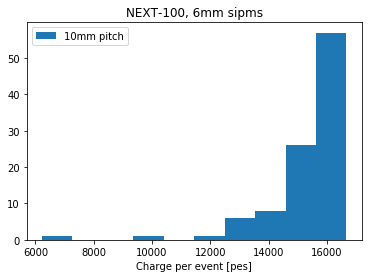

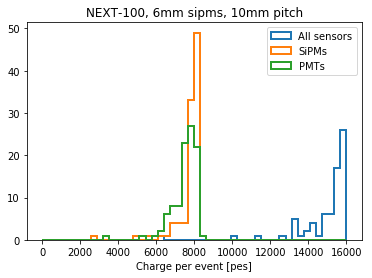

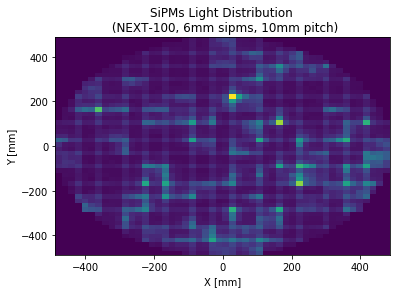

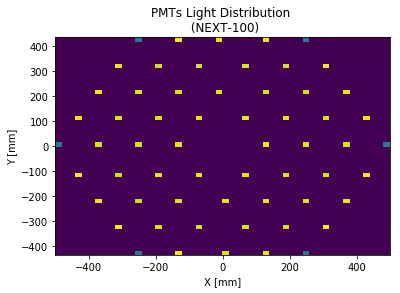

In [14]:
plt.hist(events_allsensors.charge, label="10mm pitch")
#plt.hist(events_allsensors8.charge, label='8mm pitch')
plt.xlabel("Charge per event [pes]")
plt.title("NEXT-100, 6mm sipms")
plt.legend()
plt.show()

plt.hist(events_allsensors.charge, label="All sensors", histtype="step", bins=50, range=(0,16000), linewidth=2)
plt.hist(events_allsipms.charge, label="SiPMs", histtype="step", bins=50, range=(0,16000), linewidth=2)
plt.hist(events_allpmts.charge, label="PMTs", histtype="step", bins=50, range=(0,16000), linewidth=2)
plt.xlabel("Charge per event [pes]")
plt.title("NEXT-100, 6mm sipms, 10mm pitch")
plt.legend()
plt.show()

#plt.hist(events_allsensors8.charge, label="All sensors", histtype="step", bins=50, range=(0,16000), linewidth=2)
#plt.hist(events_allsipms8.charge, label="SiPMs", histtype="step", bins=50, range=(0,16000), linewidth=2)
#plt.hist(events_allpmts8.charge, label="PMTs", histtype="step", bins=50, range=(0,16000), linewidth=2)
#plt.xlabel("Charge per event [pes]")
#plt.title("NEXT-100, 6mm sipms, 8mm pitch")
#plt.legend()
#plt.show()

# Plot sipm positions
#XYrange       =  -500, 500
#hist2d(sipm_positions.x, sipm_positions.y, (25,25), [XYrange, XYrange])
#plt.plot(sipm_positions.x, sipm_positions.y, ".")
#plt.xlim(-50,50)
#plt.ylim(-50,50)
#plt.savefig("sipm_positions.png")
#plt.close()


In [15]:
print(EnergyRes(events_allsensors.charge),EnergyRes(events_allpmts.charge), EnergyRes(events_allsipms.charge))

21.628993668783014 22.42588898078683 22.02654040344236


In [ ]:
y = events_allsipms8.charge.nunique()

In [ ]:
plt.plot(events_allsipms8.apply(lambda x: (x//100)*100).sort_values('charge').charge.value_counts(), 'o')

In [ ]:
x = events_allsipms8.apply(lambda x: (x//100)*100).sort_values('charge').charge
y = x.value_counts()

In [ ]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [ ]:
#popt, pcov = curve_fit(gaus, x.unique(), y)
mean,std=norm.fit(events_allsipms8)

In [ ]:
mean, std